In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
df = pd.read_csv('diamonds.csv')

In [4]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [5]:
df.fillna(df.mean(numeric_only=True), inplace=True)
df.drop_duplicates(inplace=True)

In [7]:
q1 = df.quantile(0.25, numeric_only=True)
q3 = df.quantile(0.75, numeric_only=True)
iqr = q3-q1
df = df[~((df< (q1-1.5*iqr))| (df > (q3 +1.5 * iqr))).any(axis=1) ]

ValueError: Operands are not aligned. Do `left, right = left.align(right, axis=1, copy=False)` before operating.

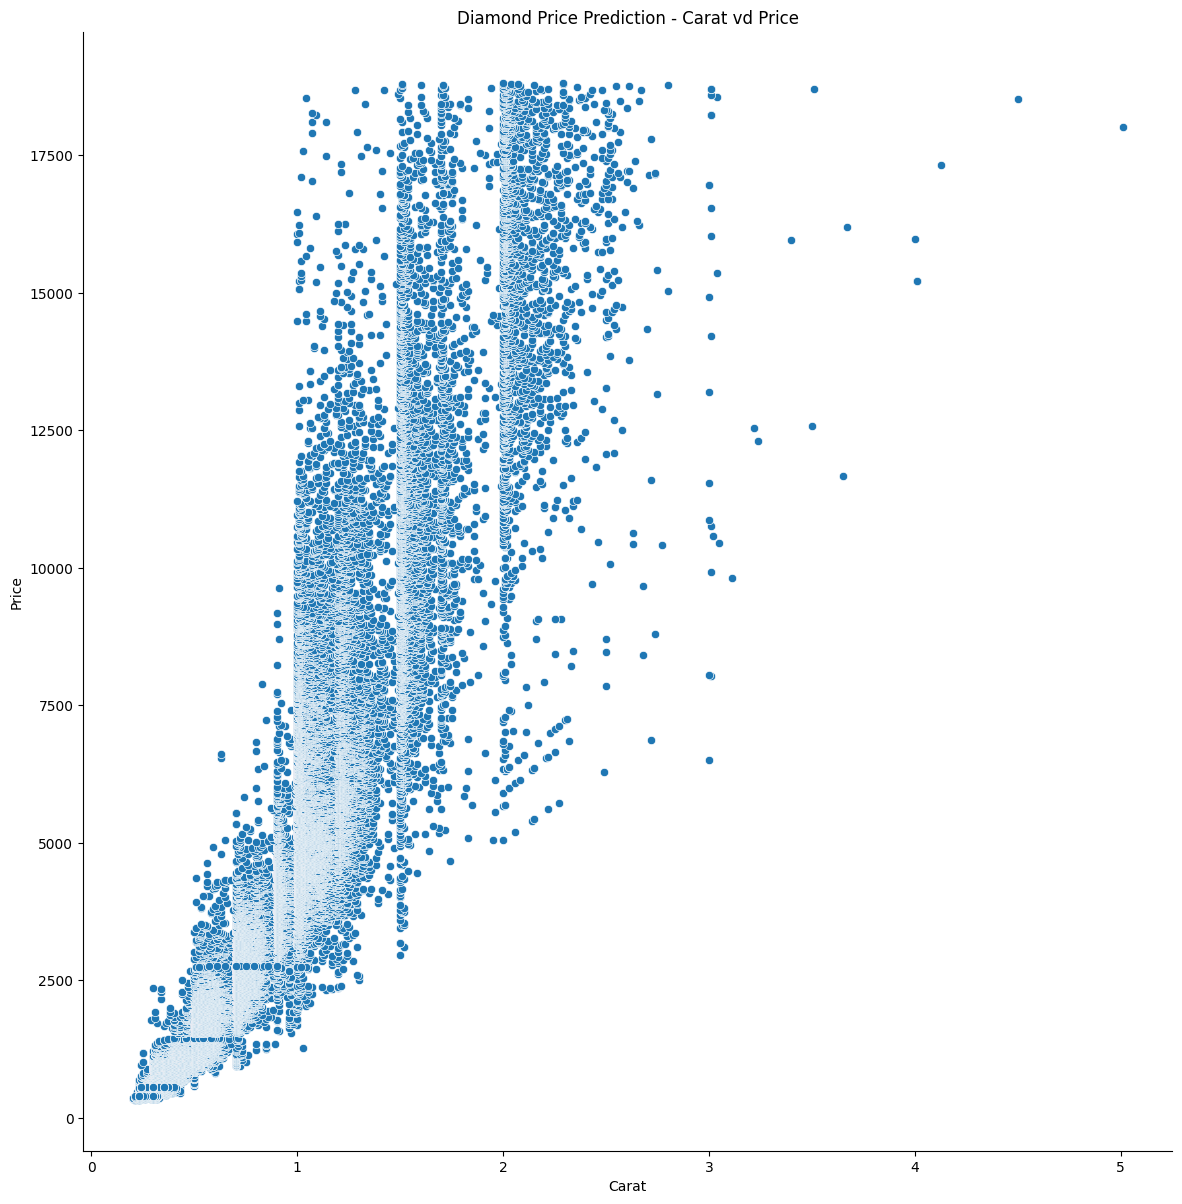

In [8]:
sns.pairplot(
    df, x_vars = ['carat'], y_vars=['price'], height=12, kind = 'scatter'
)

plt.xlabel('Carat')
plt.ylabel('Price')
plt.title('Diamond Price Prediction - Carat vd Price')
plt.show()

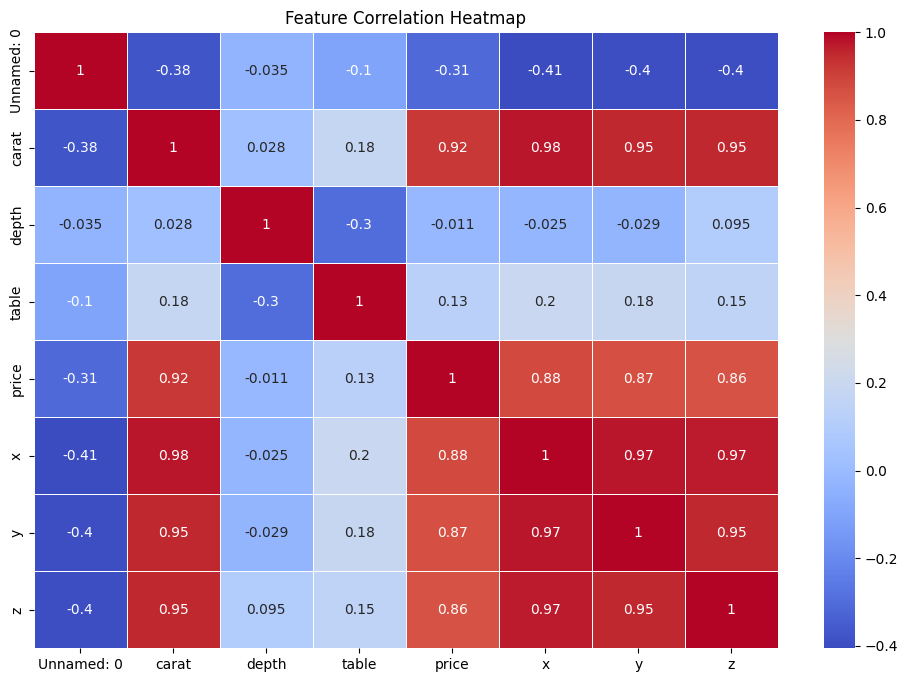

In [9]:
plt.figure(figsize=(12, 8))
sns.heatmap(
    df.corr(numeric_only=True), 
    annot=True, 
    cmap='coolwarm', 
    linewidths=0.5
)

plt.title('Feature Correlation Heatmap')
plt.show()

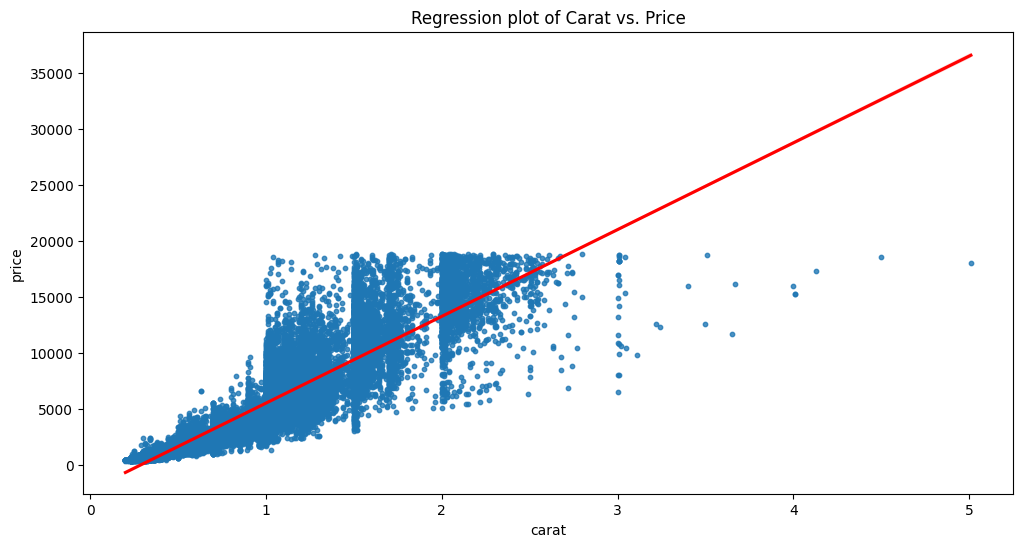

In [15]:
plt.figure(figsize=(12,6))

sns.regplot(x='carat', y ='price', data = df, scatter_kws={'s':10}, line_kws={'color':'red'} )
plt.title('Regression plot of Carat vs. Price')

plt.show()

In [16]:
X = df['carat']
y = df['price']

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=100)



In [20]:
X_train_array = np.array(X_train)
X_train = X_train_array[:, np.newaxis]

X_test_array = np.array(X_test)
X_test = X_test_array[:, np.newaxis]

In [21]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [22]:
from sklearn.linear_model import LinearRegression
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train_scaled, y_train)

LinearRegression()

In [23]:
y_pred = linear_reg_model.predict(X_test_scaled)

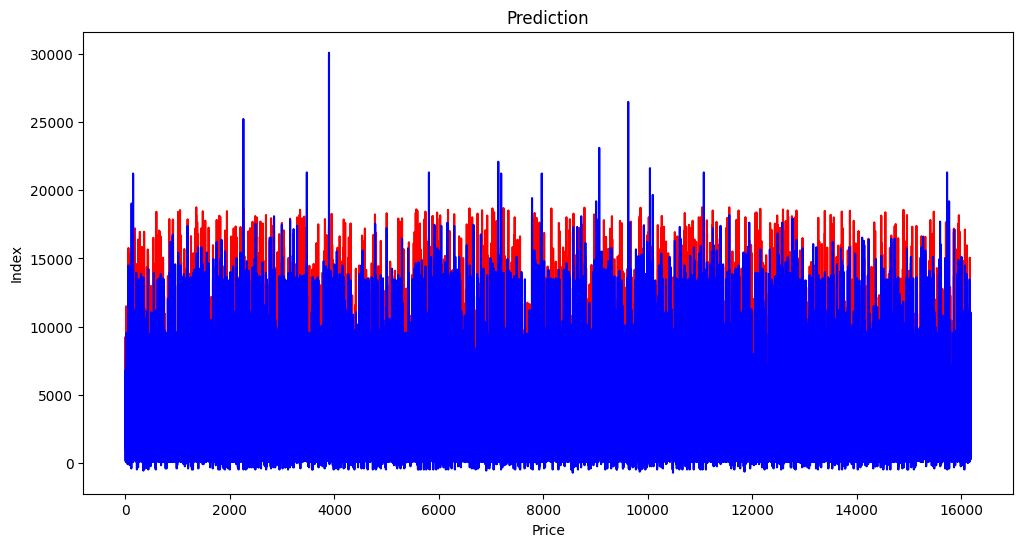

In [24]:
plt.figure(figsize=(12,6))
idx = [i for i in range(1, len(y_test)+1, 1)]

plt.plot(idx, y_test, color='r', linestyle = '-')
plt.plot(idx, y_pred, color = 'b' , linestyle = '-')

plt.xlabel('Price')
plt.ylabel('Index')
plt.title('Prediction')
plt.show()

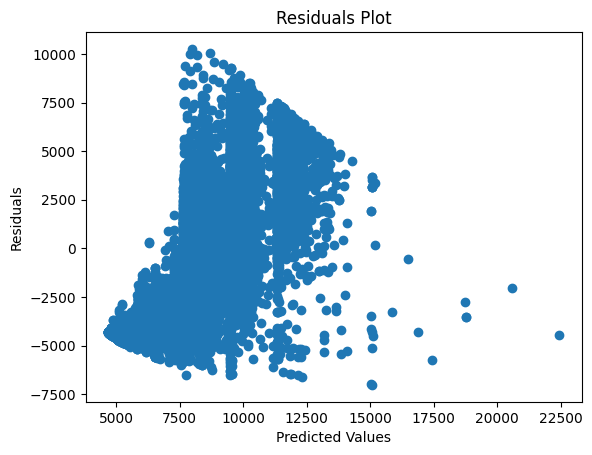

In [26]:

x_train_predict = linear_reg_model.predict(X_train)
residuals = y_train- x_train_predict

plt.scatter(x_train_predict, residuals)

plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals Plot')

plt.show()


In [27]:
from sklearn.metrics import r2_score, mean_squared_error

print('Mean Squared', mean_squared_error(y_test, y_pred))
print('R2 Score', r2_score(y_test, y_pred))

Mean Squared 2397434.788088887
R2 Score 0.8464312214174207


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


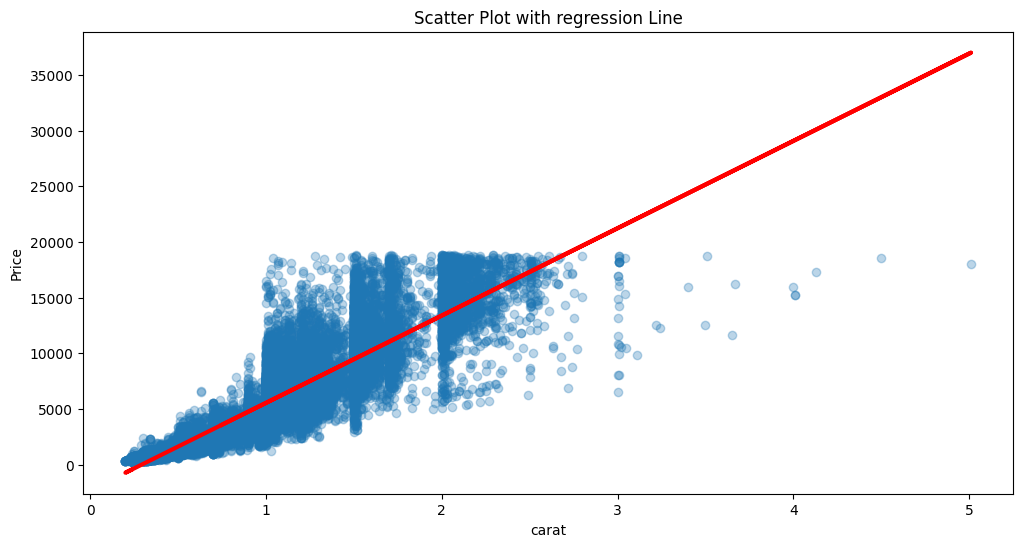

In [29]:
feature_vis = 'carat'
plt.figure(figsize=(12,6))
scaled_feature = scaler.transform(df[['carat']])

predicted_prices = linear_reg_model.predict(scaled_feature)

plt.scatter(df[feature_vis], df['price'], alpha = 0.3, label = 'Actual Value')
plt.plot(df[feature_vis], predicted_prices, color = 'red', linewidth = 3, label = 'Regression Line')

plt.xlabel(feature_vis)
plt.ylabel('Price')
plt.title('Scatter Plot with regression Line')
plt.show()
